In [45]:
import pandas as pd
import numpy as np
from pathlib import Path
import datetime as dt
import csv
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split

In [46]:

# from statsmodels.tsa.arima.model import ARIMA
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError

In [47]:
def getUnemployementPath():
    cwd = Path.cwd()
    parent = cwd.parent
    unemployement_csv_path = parent.joinpath("data/unzipped/unemployement/23157061427896605_data.tsv")
    return unemployement_csv_path


In [48]:
def loadingAndPreProcessing() -> pd.DataFrame:
    path = getUnemployementPath()
    df = pd.read_csv(path, delimiter='\t')
    del df["Age"]
    del df["value type"]
    del df["flag"]
    df["date"] = pd.to_datetime(df["date"])
    return df

df = loadingAndPreProcessing()

# Process the DataFrame as needed


/tmp/ipykernel_4558/898187547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["pct change"] = temp["value"].pct_change() *100;
/tmp/ipykernel_4558/898187547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["pct change"] = temp["value"].pct_change() *100;
/tmp/ipykernel_4558/898187547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

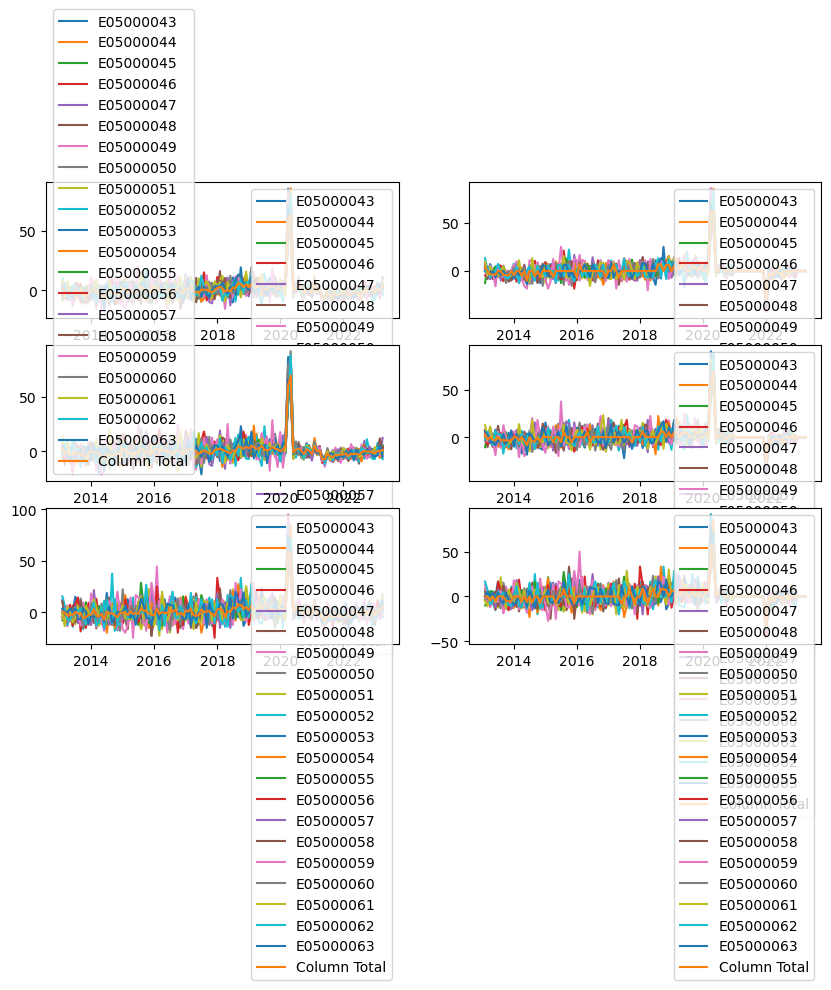

In [49]:
dct = {}
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (10,6))
for sex in df["Gender"].unique():
    for measure in df["measure"].unique():
        for geocode in df["geogcode"].unique():
            temp = df[(df["Gender"] == sex) & (df["measure"] == measure) & (df["geogcode"] == geocode)]
            temp.set_index("date", inplace=True)
            temp["pct change"] = temp["value"].pct_change() *100;
            temp = temp[1:]
            dct[f"{sex}, {measure}, {geocode}"] = temp.copy()
            if measure == "Claimant count":
                col = 0
            else:
                col = 1

            if sex == "Total":
                row = 0
            elif sex == "Male":
                row = 1
            else:
                row = 2

            ax[row, col].plot(temp.index, temp["pct change"], label=geocode);

ax[0, 0].legend()
ax[1, 0].legend()
ax[2, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()
# fig.savefig("/home/maxwell/Documents/Y2/DC2/data/img/unemployement.png")

In [66]:
for key in dct.keys():
    k = key
    break
dct[k].loc[dct[k].index.year<2020]

,Gender,measure,geogcode,value,pct change
date,,,,,
2013-02-01,Total,Claimant count,E05000043,265.0,1.923077
2013-03-01,Total,Claimant count,E05000043,255.0,-3.773585
2013-04-01,Total,Claimant count,E05000043,240.0,-5.882353
2013-05-01,Total,Claimant count,E05000043,240.0,0.000000
2013-06-01,Total,Claimant count,E05000043,245.0,2.083333
...,...,...,...,...,...
2019-08-01,Total,Claimant count,E05000043,175.0,0.000000
2019-09-01,Total,Claimant count,E05000043,170.0,-2.857143
2019-10-01,Total,Claimant count,E05000043,180.0,5.882353


In [114]:
train, test = train_test_split(dct[k]["value"].loc[(dct[k].index.year<2020)& (dct[k].index.year>2012) ])

In [115]:

model = auto_arima(train)


In [116]:
forecast = model.predict(len(test))

In [119]:
(len(train), len(forecast))
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test, forecast))

1339.0333344614646


Text(0.5, 1.0, 'Total, Claimant count, E05000043')

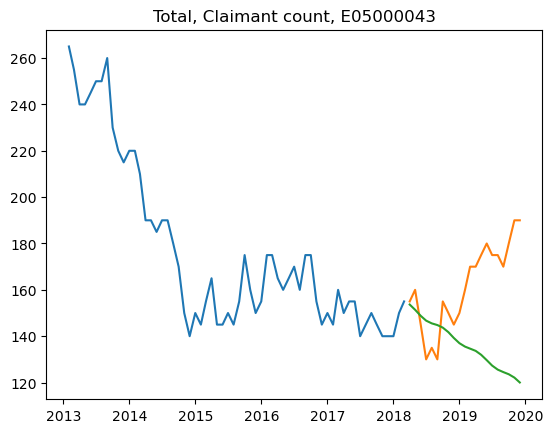

In [118]:
plt.plot(train.index, train);
plt.plot(test.index, test);
plt.plot(forecast.index, forecast);
plt.title(k)

In [108]:
# dt = dct[k]["value"].to_numpy()

In [ ]:
# input_shape = (123, 1)
# hidden_units = 32
# output_dim = 1
# learning_rate = 0.001
# eps = 10
# batch_size = 64
# data = dt.reshape(-1, 123, 1)
#

In [ ]:
# model = Sequential()
# model.add(LSTM(hidden_units, input_shape=input_shape))
# model.add(Dense(output_dim))


In [ ]:
# model.fit(data,targets, ep)